In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} nltk
!conda install --yes --prefix {sys.prefix} pandas
!conda install --yes --prefix {sys.prefix} seaborn
!conda install --yes --prefix {sys.prefix} gensim
!conda install --yes --prefix {sys.prefix} wordCloud

In [ ]:
import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install gensim
!{sys.executable} -m pip install wordCloud

# Tokenisation

In [ ]:
import re
import string

# function to tokenise a string into words
def tokenise( text ):
    tokens = []
    text = text.lower()
    text = re.sub( '--' , ' -- ' , text)
    words = re.split( r'\s+' , text )
    for w in words:
        w = w.strip( string.punctuation )
        if re.search( r"[a-zA-Z']" , w ):
            tokens.append(w)
    return tokens


freq = dict()


file = '766-0.txt'

try:
    text = open( file , encoding = 'utf-8' )
except:
    print( "Cannot read " + file + " !" )


for line in text:
    words = tokenise( line )
    for w in words:
        freq[w] = freq.get( w , 0 ) + 1

sortedList = reversed( sorted( freq , key=lambda x: freq[x]) )

for w in sortedList:
    print( w + ' => ' + str( freq[w] ) )


# A frequency list filtered using a list of stopwords

In [ ]:
import urllib.request
import re

url = "http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words"

request = urllib.request.urlopen(url)
bytes = request.read()
contents = bytes.decode("utf-8")
request.close()

contents = re.sub( r'\s+' , ' ' , contents )
stopwords = re.split( ' ' , contents )

freq = dict()


file = '766-0.txt'

try:
    text = open( file , encoding = 'utf-8' )
except:
    print( "Cannot read " + file + " !" )


for line in text:
    words = tokenise( line )
    for w in words:
        if w not in stopwords:
            freq[w] = freq.get( w , 0 ) + 1


sortedList = reversed( sorted( freq , key=lambda x: freq[x]) )
for w in sortedList:
    print( w + ' => ' + str( freq[w] ) )



# A word cloud

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt 
from wordcloud import WordCloud 

wordcloud = WordCloud( background_color="white",  width=4500,height=4500, max_words= 100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(freq)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# A concordance

In [ ]:
searchTerm = 'sun'
regex = searchTerm

file = '766-0.txt'

try:
    text = open( file , encoding = 'utf-8' )
except:
    print( "Cannot read " + file + " !" )
    
    
concordance = []

window = 30

for line in text:
    line = line.strip()
    if re.search( regex , line , re.IGNORECASE ):

        extract = ''

        position = re.search( regex , line , re.IGNORECASE ).start()
        start = position - len( searchTerm ) - window ;
        fragmentLength = start + 2 * window  + len( searchTerm )
        if fragmentLength > len( line ):
            fragmentLength = len( line )

        if start < 0:
            whiteSpace = ''
            i = 0
            while i < abs(start):
                whiteSpace += ' '
                i += 1
            extract = whiteSpace + line[ 0 : fragmentLength ]
        else:
            extract = line[ start : fragmentLength ]

        if re.search( '\w' , extract ) and re.search( regex , extract ):
            concordance.append( extract )

for c in concordance:
    print(c)

# NLTK Module

The code below demonstrates the use of the methods sent_tokenize() from the nltk module. The code calculates data about the number of sentences in the opening paragraph from Hemingways novel *A Farewell to Arms*. Try to change the code in such a way that it can be used to produce counts of the number of sentences and the number of words in your own corpus.

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

quote = '''
In the late summer of that year we lived in a house in a village that looked across the river and the plain to the mountains. In the bed of the river there were pebbles and boulders, dry and white in the sun, and the water was clear and swiftly moving and blue in the channels. Troops went by the house and down the road and the dust they raised powdered the leaves of the trees. The trunks of the trees too were dusty and the leaves fell early that year and we saw the troops marching along the road and the dust rising and leaves, stirred by the breeze, falling and the soldiers marching and afterward the road bare and white except for the leaves.
'''


sentences = sent_tokenize(quote)

print( len(sentences) )

for s in sentences:
    print(s)
    

# POS Tagging

The code below demonstrates the use of the function pos_tag(), which can be used to generate part of speech tags. Using the code below as a basis, try to produce counts of the number of nouns in the text (either singular or plural). The codes for nouns are 'NN', 'NNP', 'NNS' and 'NNPS'. See also https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [ ]:
import nltk

quote = '''
The studio was filled with the rich odour of roses, and when the light summer wind stirred amidst the trees of the garden, there came through the open door the heavy scent of the lilac, or the more delicate perfume of the pink-flowering thorn.
'''

words = word_tokenize(quote)
pos = nltk.pos_tag(words)

for p in pos:
    print(p[0] + ' => ' + p[1] )

# Lemmatisation

Lemmatisation is a process in which the conjugated forms of the words that are found in a text are converted to their base dictionary form. This base form is referred to as the lemma. Using the code below as a basis, try to produce a lemmatised version of one of the texts in your own corpus.

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import re

lemmatiser = WordNetLemmatizer()

quote = "It was the best of times, it was the worst of times"

words = words = word_tokenize(quote)
(quote)
pos = nltk.pos_tag(words)

for i in range( 0 , len(words) ):
    posTag = ''
    if re.search( '^v' ,  pos[i][1] , re.IGNORECASE ):
        posTag = 'v'
    elif re.search( '^j', pos[i][1] , re.IGNORECASE ):
        posTag = 'a'
        

    if posTag == 'v' or posTag == 'v':
        print( words[i] + ' => ' + 
           lemmatiser.lemmatize( words[i] , posTag ) )
    else:
        print( words[i] + ' => ' + 
            lemmatiser.lemmatize( words[i] ) )

# Regular expressions

Can you find all the hashtags and all the user names in the tweets that were downloaded during part 1 of the workshop?

In [ ]:
import re

tweets = open('tweets.txt')

twitterUsers = dict()
tags = dict()

for t in tweets:
    ## Enter regular expression as first parameter of findall()
    users = re.findall( r'@\w+' , t)
    for u in users:
        twitterUsers[u] = twitterUsers.get( u , 0 ) + 1

    hashTags = re.findall( r'#\w+' , t)
    for h in hashTags:
        tags[h] = tags.get( h , 0 ) + 1

for u in twitterUsers:
    print(u)

for ht in tags:
    print(ht)


# Regular expressions in Ulysses

Download the novel *Ulysses* from Project Gutenberg, using the code below.

In [ ]:

import urllib.request
import re
import time

def download( url ):

    request = urllib.request.urlopen(url)
    bytes = request.read()
    fullText = bytes.decode("utf-8")
    request.close()

    parts = re.split( '/' , url )
    id = parts[-1]

    out = open( id , 'w' , encoding = 'utf-8')
    out.write( fullText )


download('http://www.gutenberg.org/files/4300/4300-0.txt')


In this novel, find all the text fragments containing a year (e.g. the sentence “What reflection concerning the irregular sequence of dates 1884, 1885, 1886, 1888, 1892, 1893, 1904 did Bloom make before their arrival at their destination?”)

In [ ]:
import re

novel = open("4300-0.txt" , encoding='utf-8')
lines = []


for line in novel:
    lines.append(line)



for line in lines:
    if re.search( r'\d{4}' , line ):
        print( line )


Find fragments in which Joyce chose the dramatic form, or, more specifically, lines which begin with the name of a speaker in capitals, followed directly by a colon.

In [ ]:
for line in lines:
    if re.search( r'[A-Z]+:' , line ):
        print(line)

Find all the lines which contain either the singular or the plural form of "star".

In [ ]:
for line in lines:
    if re.search( r'\bstars?\b' , line ):
        print( line )

Find passages which contain at least two words that begin with "br"

In [ ]:
for line in lines:
    if re.search( r'\bbr.+\bbr.*' , line ):
        print( line )

# Pandas

Using the pandas library, open the csv file named 'vanGogh.csv' and print the following:

* information about the number of rows and the number of columns
* print the first 3 rows
* print a list of all column names

In [ ]:
import pandas as pd

df = pd.read_csv( 'vanGogh.csv' )

print( df.shape )
print( df.head(2) )
print( df.columns )

print( df['title'] )

Using the pandas library, calculate the correlations between the columns in your csv file. Additionally, print a list of the means of all the columns.

In [ ]:
import pandas as pd

df = pd.read_csv( 'vanGogh.csv' )

print(df.mean())
print(df.corr())

Install the module 'seaborn'. Use the seaborn libraries and the pandas libraries to create a heatmap that visualises the correlations between all the columns in the data frame.

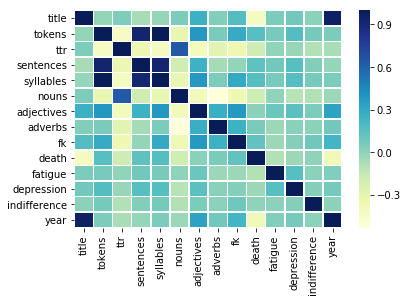

In [1]:
%matplotlib inline

import pandas as pd

df = pd.read_csv( 'vanGogh.csv' )


import seaborn as sns
import matplotlib.pylab as plt


ax = sns.heatmap( df.corr() , linewidth=0.5 , cmap="YlGnBu" )
plt.show()

# Matplotlib

A scatter plot

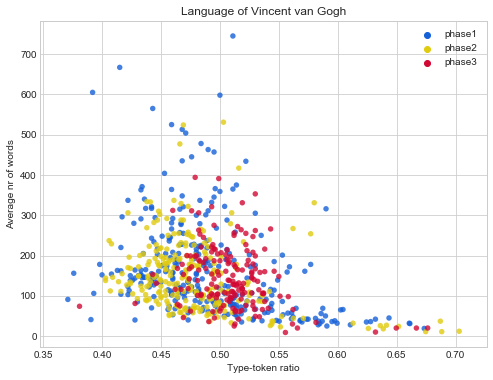

In [8]:
%matplotlib inline

import pandas as pd

df = pd.read_csv( 'vanGogh.csv' )


colours = []

## 1883: Move to Antwerp and Paris
## 1888: Move to Arles

legendDict = dict()

for y in df['year']:
    if y < 1883:
        colours.append('#1560d8')
        legendDict['phase1'] = '#1560d8'
    elif y < 1888:
        colours.append('#e0cb0f')
        legendDict['phase2'] = '#e0cb0f'
    else:
        colours.append('#d10833')
        legendDict['phase3'] = '#d10833'


        
    
plt.style.use('seaborn-whitegrid')

fig = plt.figure( figsize=( 8 , 6 ) )
ax = plt.axes()

ax.scatter( df['ttr'], df['sentences'] , alpha=0.8, edgecolors='none', s=30, label=None , c = colours )
ax.set_xlabel('Type-token ratio')
ax.set_ylabel('Average nr of words')

ax.set_title( 'Language of Vincent van Gogh')

( 'Language of Vincent van Gogh')


for l in legendDict:
    ax.scatter( [] , []  , label = l ,  c = legendDict[l] )

ax.legend()

plt.show()


## A line chart

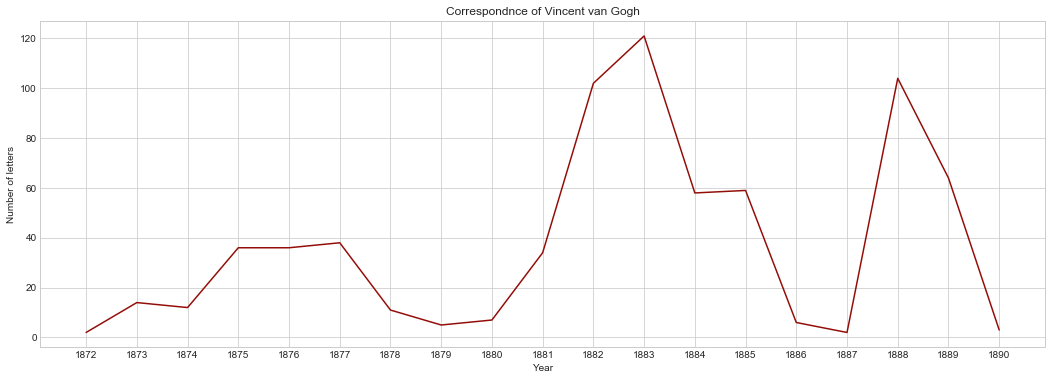

In [23]:
%matplotlib inline

import pandas as pd

df = pd.read_csv( 'vanGogh.csv' )

freq = dict()
for year in df['year']:
    year = str(year)
    freq[ year ] = freq.get( year , 0 ) + 1
    

plt.style.use('seaborn-whitegrid')


fig = plt.figure(  figsize=( 18 , 6 ) )
ax = plt.axes()

ax.plot( freq.keys() , freq.values() , color = '#930d08' , linestyle = 'solid')

ax.set_xlabel('Year')
ax.set_ylabel('Number of letters')
ax.set_title( 'Correspondnce of Vincent van Gogh')

plt.show()



# Dispersion graph

In [ ]:

import urllib.request
import re
import time

def download( url ):

    request = urllib.request.urlopen(url)
    bytes = request.read()
    fullText = bytes.decode("utf-8")
    request.close()

    parts = re.split( '/' , url )
    id = parts[-1]

    out = open( id , 'w' , encoding = 'utf-8')
    out.write( fullText )
    out.close()
    time.sleep( 3 )


download('https://raw.githubusercontent.com/peterverhaar/dtdp/master/Texts/APortraitOfTheArtist.txt')


The following code divides the full text of Joyce’s novel A Portrait of the Artist into smaller segments. Each of these segments has the same length (i.e. they contain the exact same number of words). The number of segments is determined by the variable namd numberOfSegments. The code stores these segments in a list called segments. Once we have captured these different segments, we can calculate the frequencies of specific textual phenomena within these different segments. The code below calculates the frequencies of certain patterns using regular expressions, and using the findall() function of the ‘re’ module. Such counts can give us an impression of the dispersion of these phenomena across the full text. Add some code which can visualise the frequencies in each segment as a line chart. In order words, try to create a dispersion graph. Clarify the distribution of the following words:

* god
* artist, art or artistic
* father
* mother
* young or youth
* religion
* catholic
* ireland or irish
* england or english

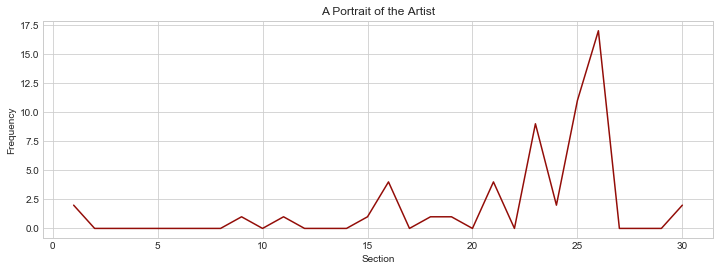

In [11]:
### code to divide the novel into segments.
### The number of segments is determined by variable numberOfSegments

import re

numberOfSegments = 30
segments = []

novel = open('APortraitOfTheArtist.txt')

## The read() function can read in the entire file as a single string
fullText = novel.read()
allWords = re.split( r'\s+' , fullText )

segmentSize = int( len(allWords) / numberOfSegments )

countWords = 0 
text = ''

for word in allWords:
    countWords += 1
    text += word + ' ' 
    
    ## This line below used the modulo operator:
    ## We can use it to test if the first number is 
    ## divisible by the second number
    if countWords % segmentSize == 0:
        segments.append(text.strip())
        text = ''

        
data = dict()
        
count = 0 
for s in segments:
    count += 1
    hits = re.findall( r'\bart(ist)?' , s , re.IGNORECASE )
    data[ count ] = len( hits )
    

## This next line is needed to visualise the data within the Notebook
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure( figsize=( 12 , 4 ) )
ax = plt.axes()

ax.plot( data.keys() , data.values() , color = '#930d08' , linestyle = 'solid')

ax.set_xlabel('Section')
ax.set_ylabel('Frequency')

ax.set_title( 'A Portrait of the Artist')
plt.show()

The code below can be used to create a bar chart. Experiment with different values for the width, the colour and the opacity of the bars. Try to change the labels for the X-axis and the Y-axis as well.

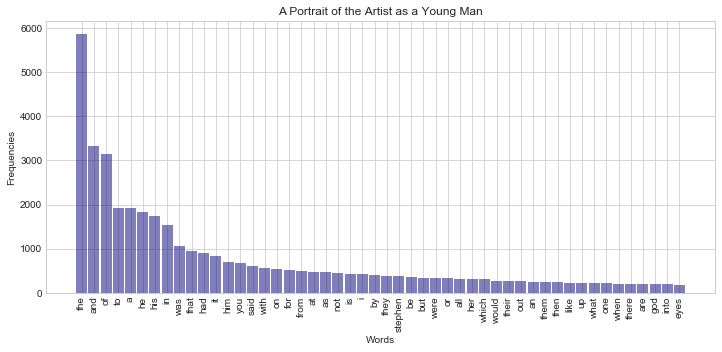

In [12]:
import re
import string

textFile = 'APortraitOfTheArtist.txt'
maxNrWords = 50

## function to tokenise a string into words
def tokenise( text ):
    tokens = []
    text = text.lower()
    text = re.sub( '--' , ' -- ' , text)
    words = re.split( r'\s+' , text )
    for w in words:
        w = w.strip( string.punctuation )
        if re.search( r"[a-zA-Z']" , w ):
            tokens.append(w)
    return tokens

novel = open( textFile )

## Calculate the frequencies of all the words
freq = dict()

for paragraph in novel:
    words = tokenise(paragraph)
    for w in words:
        freq[w] = freq.get(w,0)+1
            

## determine the 50 most frequent words, and 
## place these in a dictionary named mostFreq()

sortedWords = reversed( sorted( freq , key=lambda x: freq[x]) )
mostFreq = dict()

count = 0 
for w in sortedWords:
    mostFreq[w] = freq[w]
    count += 1
    if count == maxNrWords:
        break
        

%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure( figsize=( 12 , 5 ) )
ax = plt.axes()

ax.bar( mostFreq.keys() , mostFreq.values() , width = 0.9 , alpha = 0.5 , color = '#03017a')

ax.set_xlabel('Words')
ax.set_ylabel('Frequencies')
ax.set_title( 'A Portrait of the Artist as a Young Man')

## labels for the ticks on the X-axis need to 
## be shown vertically to improve the readability
plt.xticks(rotation=90)

plt.show()